In [1]:
import tensorflow as tf
from tensorflow import keras

tf.config.set_visible_devices
x = tf.config.list_physical_devices('GPU')
assert tf.config.list_physical_devices('GPU')
assert tf.test.is_built_with_cuda()

print(tf.__version__)

print(keras.__version__)

from keras.utils import np_utils

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

with tf.compat.v1.Session() as sess:
    hello_world = tf.constant("Hello, world!")
    print(sess.run(hello_world))
    print(sess.run(tf.constant(123)*tf.constant(456)))

2.6.0
2.6.0
Num GPUs Available:  1
b'Hello, world!'
56088


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12072\357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12072\357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy prosty model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 7s 6ms/step - loss: 0.4905 - accuracy: 0.7691 - val_loss: 0.4038 - val_accuracy: 0.8022
Epoch 2/100
943/943 [==============================] - 5s 5ms/step - loss: 0.3905 - accuracy: 0.8090 - val_loss: 0.3782 - val_accuracy: 0.8154
Epoch 3/100
943/943 [==============================] - 5s 5ms/step - loss: 0.3790 - accuracy: 0.8118 - val_loss: 0.3788 - val_accuracy: 0.8110
Epoch 4/100
943/943 [==============================] - 5s 5ms/step - loss: 0.3776 - accuracy: 0.8122 - val_loss: 0.3705 - val_accuracy: 0.8150
Epoch 5/100
943/943 [==============================] - 5s 6ms/step - loss: 0.3731 - accuracy: 0.8130 - val_loss: 0.3660 - val_accuracy: 0.8158
Epoch 6/100
943/943 [==============================] - 5s 5ms/step - loss: 0.3715 - accuracy: 0.8153 - val_loss: 0.3670 - val_accuracy: 0.8191
Epoch 7/100
943/943 [==============================] - 6s 6ms/step - loss: 0.3713 - accuracy: 0.8125 - val_loss: 0.3665 - val_accuracy: 0.8165

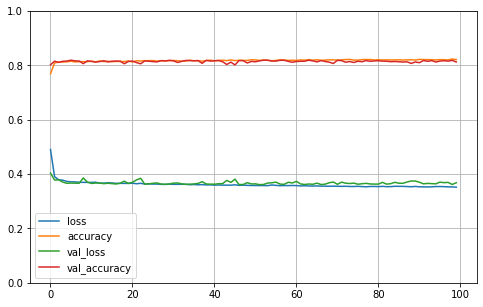

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8124


[0.3680618107318878, 0.8123505711555481]

In [11]:
from sklearn import metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

0.8123505976095617

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych z fróżnymi funkcjami aktywacji:
* sigmoid
* tanh
* relu
* elu
* LeakyReLU

--------------
 sigmoid 


Epoch 1/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3817 - accuracy: 0.8223 - val_loss: 0.3499 - val_accuracy: 0.8349
Epoch 2/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3369 - accuracy: 0.8433 - val_loss: 0.3379 - val_accuracy: 0.8381
Epoch 3/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3304 - accuracy: 0.8473 - val_loss: 0.3285 - val_accuracy: 0.8469
Epoch 4/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3258 - accuracy: 0.8483 - val_loss: 0.3261 - val_accuracy: 0.8489
Epoch 5/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3237 - accuracy: 0.8495 - val_loss: 0.3332 - val_accuracy: 0.8428
Epoch 6/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3222 - accuracy: 0.8495 - val_loss: 0.3232 - val_accuracy: 0.8495
Epoch 7/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3210 - accuracy: 0.8498 - val_loss: 0.3258 - 

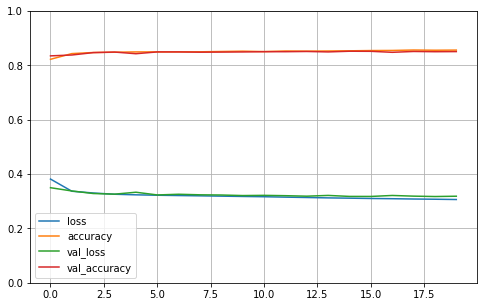

--------------
 tanh 


Epoch 1/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3480 - accuracy: 0.8377 - val_loss: 0.3296 - val_accuracy: 0.8456
Epoch 2/20
943/943 [==============================] - 7s 7ms/step - loss: 0.3240 - accuracy: 0.8483 - val_loss: 0.3266 - val_accuracy: 0.8471
Epoch 3/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3165 - accuracy: 0.8513 - val_loss: 0.3201 - val_accuracy: 0.8522
Epoch 4/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3116 - accuracy: 0.8550 - val_loss: 0.3210 - val_accuracy: 0.8491
Epoch 5/20
943/943 [==============================] - 7s 7ms/step - loss: 0.3087 - accuracy: 0.8549 - val_loss: 0.3158 - val_accuracy: 0.8535
Epoch 6/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3038 - accuracy: 0.8571 - val_loss: 0.3174 - val_accuracy: 0.8518
Epoch 7/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3013 - accuracy: 0.8596 - val_loss: 0.3197 - val

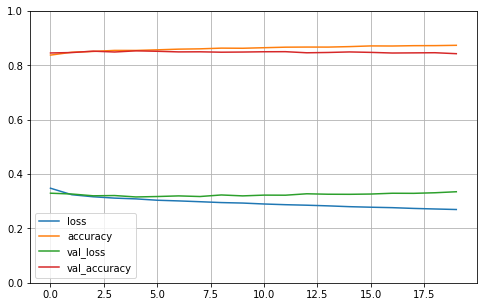

--------------
 relu 


Epoch 1/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3433 - accuracy: 0.8384 - val_loss: 0.3285 - val_accuracy: 0.8470
Epoch 2/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3170 - accuracy: 0.8514 - val_loss: 0.3288 - val_accuracy: 0.8460
Epoch 3/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3117 - accuracy: 0.8542 - val_loss: 0.3258 - val_accuracy: 0.8480
Epoch 4/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3085 - accuracy: 0.8578 - val_loss: 0.3251 - val_accuracy: 0.8451
Epoch 5/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3060 - accuracy: 0.8575 - val_loss: 0.3210 - val_accuracy: 0.8513
Epoch 6/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3033 - accuracy: 0.8588 - val_loss: 0.3275 - val_accuracy: 0.8458
Epoch 7/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3022 - accuracy: 0.8601 - val_loss: 0.3229 - val

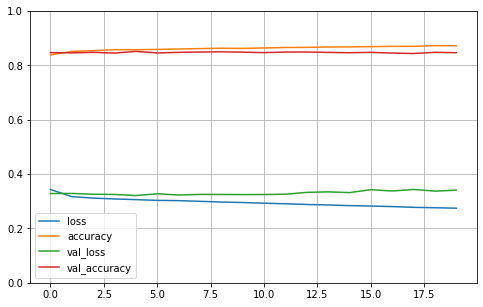

--------------
 elu 


Epoch 1/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3392 - accuracy: 0.8411 - val_loss: 0.3234 - val_accuracy: 0.8515
Epoch 2/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3198 - accuracy: 0.8502 - val_loss: 0.3252 - val_accuracy: 0.8493
Epoch 3/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3150 - accuracy: 0.8517 - val_loss: 0.3249 - val_accuracy: 0.8467
Epoch 4/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3119 - accuracy: 0.8534 - val_loss: 0.3216 - val_accuracy: 0.8520
Epoch 5/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3099 - accuracy: 0.8543 - val_loss: 0.3201 - val_accuracy: 0.8513
Epoch 6/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3082 - accuracy: 0.8571 - val_loss: 0.3228 - val_accuracy: 0.8491
Epoch 7/20
943/943 [==============================] - 6s 6ms/step - loss: 0.3061 - accuracy: 0.8576 - val_loss: 0.3224 - val_

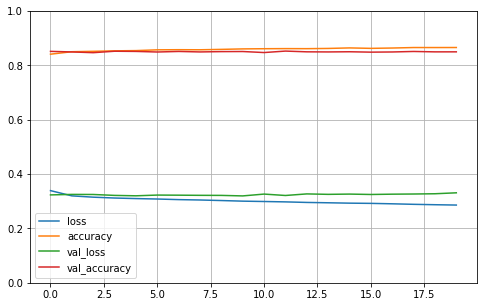

--------------
 LeakyReLU 


Epoch 1/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3379 - accuracy: 0.8411 - val_loss: 0.3286 - val_accuracy: 0.8492
Epoch 2/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3183 - accuracy: 0.8506 - val_loss: 0.3238 - val_accuracy: 0.8471
Epoch 3/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3141 - accuracy: 0.8527 - val_loss: 0.3241 - val_accuracy: 0.8463
Epoch 4/20
943/943 [==============================] - 5s 6ms/step - loss: 0.3117 - accuracy: 0.8559 - val_loss: 0.3215 - val_accuracy: 0.8492
Epoch 5/20
943/943 [==============================] - 5s 5ms/step - loss: 0.3102 - accuracy: 0.8571 - val_loss: 0.3254 - val_accuracy: 0.8471
Epoch 6/20
943/943 [==============================] - 6s 7ms/step - loss: 0.3093 - accuracy: 0.8568 - val_loss: 0.3242 - val_accuracy: 0.8475
Epoch 7/20
943/943 [==============================] - 7s 7ms/step - loss: 0.3073 - accuracy: 0.8576 - val_loss: 0.3260 

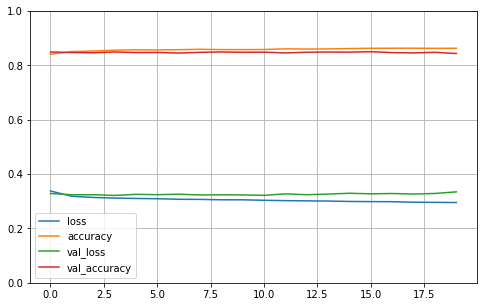

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import pandas as pd
from sklearn import  metrics

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU"]
# history1,history2,history3,history4,history5 = History(),History(),History(),History(),History()
# model1,model2,model3,model4,model5 = Sequential(),Sequential(),Sequential(),Sequential(),Sequential()

# histories = [history1,history2,history3,history4,history5]
# models = [model1,model2,model3,model4,model5]
dfs = []

for activ in act_fun:
    history = History()
    model = Sequential()
    model.add(Dense(100,activation=activ,input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(50,activation=activ))
    model.add(Dense(10,activation=activ))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

    print("--------------\n", activ,'\n\n')

    history = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32,epochs=20);

    print("\n--------------\n",model.evaluate(X_test_scaled,y_test))
    ypred = model.predict(X_test_scaled)
    pred_classes = np.where(ypred > 0.5, 1,0)
    print(metrics.accuracy_score(y_true= y_test, y_pred= pred_classes ))

    dfs.append(pd.DataFrame(history.history))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

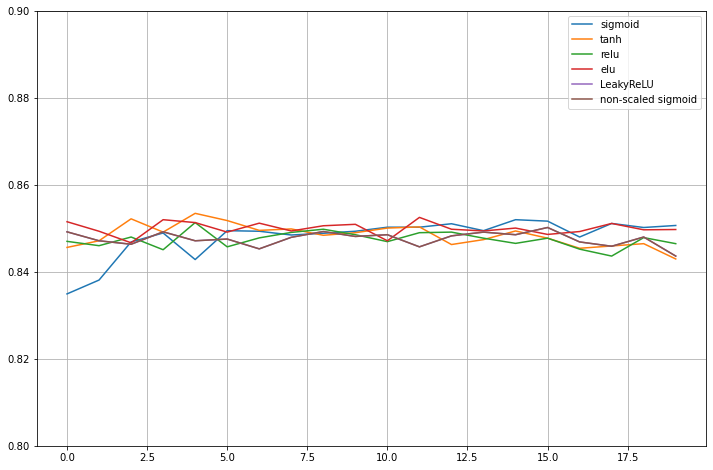

In [15]:
plt.figure(figsize=(12, 8))
act_fun = ["sigmoid","tanh","relu", "elu","LeakyReLU","non-scaled sigmoid"]
dfs.append(pd.DataFrame(history.history))

for df,fun in zip(dfs,act_fun):
    df['val_accuracy'].plot(label = fun)
    plt.grid(True)
    plt.gca().set_ylim(0.8, 0.9)

plt.legend()
plt.show()